# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

In [1]:
# All required libraries are imported here for you.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score
import warnings # remove warnigns that pyplot throws up
warnings.filterwarnings("ignore")

# Load the dataset
crops = pd.read_csv("datasets/soil_measures.csv")

print(crops.head())

    N   P   K        ph  crop
0  90  42  43  6.502985  rice
1  85  58  41  7.038096  rice
2  60  55  44  7.840207  rice
3  74  35  40  6.980401  rice
4  78  42  42  7.628473  rice


In [2]:
# Check for missing values
crops.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [3]:
# Check how many crops we have, i.e., multi-class target
crops.crop.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [4]:
# Determine feature and target columns

X = crops.iloc[:,1:]
y = crops["crop"]
max_inter = 2000
multi_class = 'mulitnominal'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

for feature in crops.columns[:-1]:
    # Fit Logistic Regression model
    model = LogisticRegression(
        max_iter=2000,
        multi_class="multinomial",
    )
    model.fit(X_train[[feature]], y_train)
    y_pred = model.predict(X_test[[feature]])
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"{feature}: F1 Score = {f1:.4f}")

N: F1 Score = 0.1067
P: F1 Score = 0.1328
K: F1 Score = 0.2138
ph: F1 Score = 0.0453


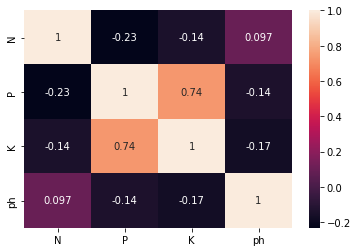

In [5]:
# Create a heatmap
sns.heatmap(X.corr(), annot=True)
plt.show()

In [6]:
# Determine feature and target columns

final_features = crops.iloc[:,[0,2,3]]
y = crops["crop"]

In [7]:
# Set max_iter to 2000 and multi_class to an appropriate string value
max_iter = 2000
multi_class = 'multinomial'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_features, y, test_size=0.2, random_state=42)

# Fit Logistic Regression model
log_reg = LogisticRegression(max_iter=max_iter, multi_class=multi_class)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate f1_score
model_performance = f1_score(y_test, y_pred, average='weighted')

print(f"F1 Score = {model_performance:.4f}")

F1 Score = 0.5697
